# Importing Libraries and Dataset

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Checking columns,info about the dataset

In [24]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [61]:
df.isnull().sum()
##As we can see there are certain columns which contain missing data(bpay_biller_code,merchant_id,merchant_suburb,merchant_state etc)

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dom                      0
weekday                  0
dtype: int64

## Confirming whether there are 100 unique customers in the dataset

In [27]:
df["account"].nunique()

100

In [28]:
df["date"] = pd.to_datetime(df["date"])


In [29]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [30]:
#Total number of transactions made on each day
df['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
2018-09-21    160
2018-10-03    160
2018-10-04    159
2018-09-27    159
2018-10-19    158
2018-08-03    157
2018-10-26    157
2018-08-24    156
2018-09-13    154
2018-10-12    154
2018-08-31    153
2018-08-23    152
2018-08-02    152
2018-09-07    152
2018-09-06    152
2018-08-10    151
2018-10-18    150
2018-08-22    150
2018-09-26    149
2018-09-05    149
2018-09-12    149
2018-08-09    149
2018-10-24    148
2018-09-19    148
2018-10-10    146
             ... 
2018-08-19    118
2018-08-21    118
2018-09-11    118
2018-09-16    118
2018-09-25    117
2018-08-14    117
2018-08-26    116
2018-09-23    114
2018-08-07    114
2018-10-09    113
2018-10-15    112
2018-09-17    112
2018-10-22    112
2018-08-27    111
2018-09-03    109
2018-08-12    109
2018-09-30    107
2018-10-07    105
2018-08-13    104
2018-10-01    103
2018-09-10    103
2018-10-29    102
2018-10-16    102
2018-09-24    101
2018-08-05

In [31]:
#Number of transactions made by each customer
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
CUS-1196156254    245
CUS-2695611575    239
CUS-51506836      239
CUS-860700529     233
CUS-1669695324    230
CUS-127297539     199
CUS-883482547     178
CUS-4142663097    174
CUS-443776336     170
CUS-4023861240    169
CUS-164374203     166
CUS-2663907001    165
CUS-325142416     163
CUS-3142625864    163
CUS-1433879684    155
CUS-537508723     152
CUS-527400765     151
CUS-2178051368    148
CUS-3336454548    145
CUS-1790886359    144
CUS-3325710106    141
CUS-2376382098    139
CUS-3117610635    139
CUS-3129499595    137
CUS-261674136     134
                 ... 
CUS-1140341822     80
CUS-2738291516     80
CUS-1816693151     78
CUS-880898248      78
CUS-423725039      78
CUS-134833760      77
CUS-134193016      76
CUS-1220154422     75
CUS-1005756958     73
CUS-2484453271     72
CUS-2370108457     67
CUS-2819545904     63
CUS-3989008654     62
CUS-331942311      62
CUS-263089

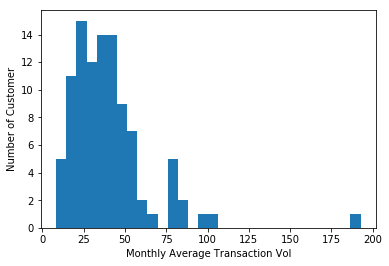

In [37]:
# Calculated the Monthly Average Transaction Vol


Vol = df.amount.groupby(df.account)
Ave_Vol = Vol.count()/3

plt.hist(Ave_Vol, bins = 30)
plt.xlabel('Monthly Average Transaction Vol')
plt.ylabel('Number of Customer')
plt.show()

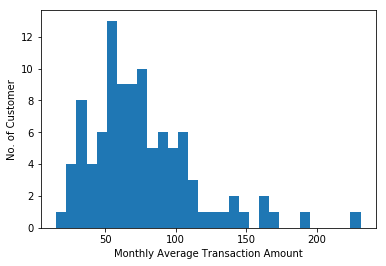

In [38]:
# Calculated the Monthly Average Transaction Amount

Ave_Amt = Vol.mean()/3

plt.hist(Ave_Amt,bins = 30)
plt.xlabel('Monthly Average Transaction Amount')
plt.ylabel('No. of Customer')
plt.show()

In [40]:
#A function that gets the date of the month from the date column

def get_dom(date):
    return date.day

df['dom'] = df['date'].map(get_dom)
df.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,dom
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,31
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,31
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,31
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,31
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit,31


Text(0.5, 1.0, 'Number of Transcation w.r.t. dates of month')

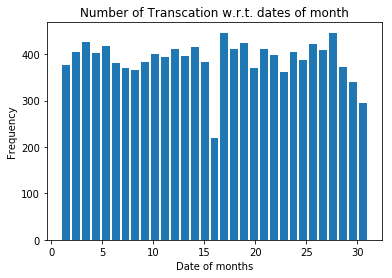

In [41]:
plt.hist(df.dom, bins = 31, rwidth = 0.8)
plt.xlabel("Date of months")                                        
plt.ylabel("Frequency")
plt.title("Number of Transcation w.r.t. dates of month")


In [42]:
#Function that gets weekday based on the date in the date column

def get_weekday(date):
    return date.weekday()

df['weekday'] = df['date'].map(get_weekday)
df.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,dom,weekday
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,31,2
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,31,2
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,31,2
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,31,2
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit,31,2


Text(0.5, 1.0, 'Number of Transcation w.r.t. weekdays')

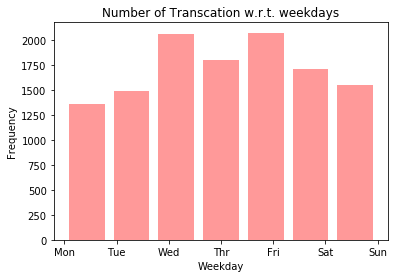

In [45]:
plt.hist(df.weekday, bins=7,alpha=0.4, color='red',rwidth=0.8)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Frequency')                                                 
plt.title('Number of Transcation w.r.t. weekdays')

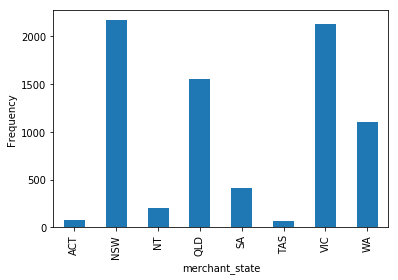

In [47]:
#Checking the frequency of merchants state wise
df.amount.groupby(df['merchant_state']).count().plot(kind="bar")
plt.ylabel("Frequency")
plt.show()

In [51]:
df_aug = df[(df['date'] >= '2018-08-01') & (df['date'] < '2018-09-01')]
print("The mean amount for August month is",df_aug['amount'].mean())
print("The mean balance for August month is",df_aug['balance'].mean())

The mean amount for August month is 185.12186659903654
The mean balance for August month is 10794.148620339827


In [52]:
df_sept= df[(df['date'] >= '2018-09-01') & (df['date'] < '2018-10-01')]
print("The mean amount for Septmeber month is",df_sept['amount'].mean())
print("The mean balance for September month is",df_sept['balance'].mean())

The mean amount for Septmeber month is 182.04590331422853
The mean balance for September month is 14730.151136306984


In [53]:
df_oct = df[(df['date'] >= '2018-10-01') & (df['date'] < '2018-11-01')]
print("The mean amount for October month is",df_oct['amount'].mean())
print("The mean balance for October month is",df_oct['balance'].mean())

The mean amount for October month is 196.42732321996542
The mean balance for October month is 18450.991565940836


In [54]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [55]:
df.amount.groupby(df['txn_description']).count()


txn_description
INTER BANK     742
PAY/SALARY     883
PAYMENT       2600
PHONE BANK     101
POS           3783
SALES-POS     3934
Name: amount, dtype: int64

(0, 100)

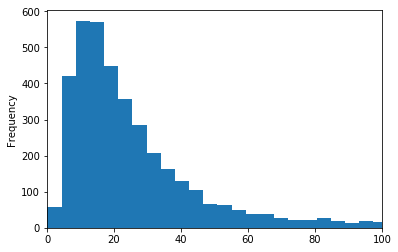

In [57]:
df[df["txn_description"]=='SALES-POS'].amount.plot.hist(bins=1000)
plt.xlim(0, 100)

(0, 100)

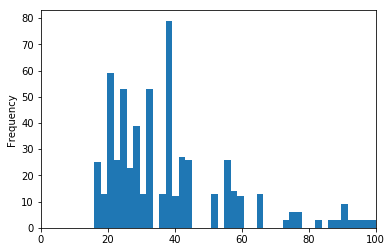

In [58]:
df[df["txn_description"]=='INTER BANK'].amount.plot.hist(bins=1000)
plt.xlim(0, 100)

(0, 100)

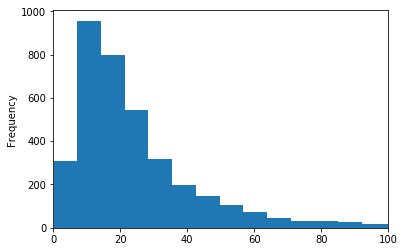

In [59]:
df[df["txn_description"]=='POS'].amount.plot.hist(bins=1000)
plt.xlim(0, 100)